In [1]:
# this is an example of additive effect of G and E.
# i.e. G and E independently affect phenotype.

In [2]:
import random
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [3]:
# make toy data
df=pd.DataFrame()
df['E']= [1] * 50 + [2] * 50  # environment
df['G']=[ random.choice([0, 1, 2]) for _ in range(100) ]  # genotype
df['pheno']= np.random.rand(100) * (df['G'] + df['E'])  # phenotype, additive of G and E

In [4]:
df

,E,G,pheno
0,1,2,1.906746
1,1,2,2.466957
2,1,0,0.118292
3,1,0,0.310167
4,1,2,0.973707
...,...,...,...
95,2,1,1.578911
96,2,0,0.979432
97,2,2,1.026160
98,2,1,0.455783


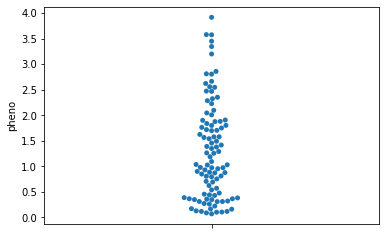

In [5]:
sns.swarmplot(data=df, y='pheno')

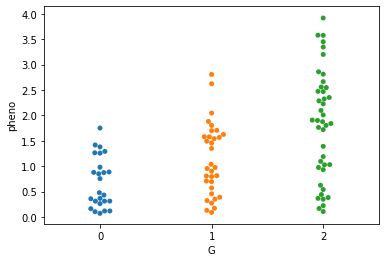

In [6]:
sns.swarmplot(data=df, x='G', y='pheno')

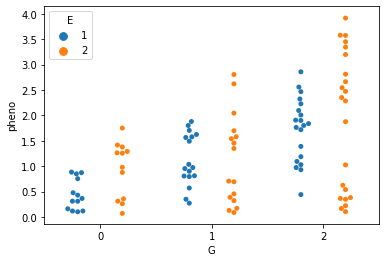

In [7]:
sns.swarmplot(data=df, x='G', y='pheno', hue='E', dodge=True)

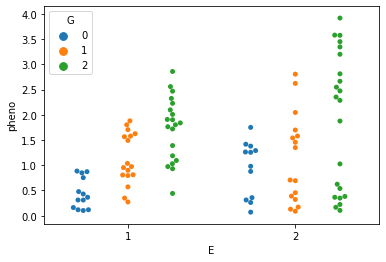

In [8]:
sns.swarmplot(data=df, x='E', y='pheno', hue='G', dodge=True)

In [9]:
# fit linear model, GxE
reg=smf.ols(formula='pheno ~ G + E', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  pheno   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     16.15
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           8.81e-07
Time:                        21:50:32   Log-Likelihood:                -122.47
No. Observations:                 100   AIC:                             250.9
Df Residuals:                      97   BIC:                             258.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3315      0.287      1.153      0.252      -0.239       0.902
G              0.5756      0.104      5.508      0.000       0.368       0.783
E              0.2000      0.167      1.195      0.235      -0.132       0.532
==============================================================================
Omnibus:                        0.207   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.901   Jarque-Bera (JB):                0.390
Skew:                          -0.026   Prob(JB):                        0.823
Kurtosis:                       2.698   Cond. No.                         8.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""